# Exploratory Domain Analysis and Data Cleaning/Pre-Proccessing
**Check-in 1**
Our team has chosen to use the **Student Performance Factors Dataset**

**Features**
The main features our team will be focused on are:


*   Hours Studied
*   Attendance
*   Parental Involvement
*   Access to Resources
*   Previous Scores
*   Learning Disability
*   Distance from Home
*   Tutoring Sessions

Explanation:
The Response Variable we are using will be **Exam_Score**
Therefore we're looking for what features we'd expect to have a greatest impact on exam score. The general list of features was deduced using domain knowledge, as we're all students who have some domain expertise in exam performance.

From this list we looked at some correlations between these features and our main response variable. Some of these plots can be shown below. Using the combination of our initial feature list and the resulting modeling, we concluded on focusing on the above features.


Hour_Studied: Quantifies work put in to prepare for the exam

Attendance: Quantifies participation in class to learn material

Previous_Scores: Displayed past performance by same student

Learning_Disabilities: Binary classification that impacts learning

Parental_Involvement & Tutoring_Sessions: Describe outside assistance

Distance_from_Home:  Impact time available to study and relationship with school

Access_to_Resources: Impacts ability and quality of studying



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loaded_data = pd.read_csv("/content/StudentPerformanceFactors.csv")

data=loaded_data.copy()

data.head(10)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
# Data Cleaning attempts (Missingness and Imputation)

# Searched data for missing values
print("columns and how many null values")
print(data.isnull().sum())

# Check for any negative values
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number'])

# Check for negative values in each numeric column
print("numeric columns", numeric_cols.columns)
negative_counts = (numeric_cols < 0).sum()

# Display columns with negative values
print("Count of Negative Values in Each Numeric Column:")
print(len(negative_counts[negative_counts > 0]))  # Only show columns with negative values


columns and how many null values
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
numeric columns Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Count of Negative Values in Each Numeric Column:
0


In [ ]:
# From the above we can see that Distance From Home has some invalid cells
null_distance_rows = data[data['Distance_from_Home'].isnull()]

# We can confirm that some rows are coming up with NAN
# Get all unique values in 'Distance_from_Home' column
unique_values = data['Distance_from_Home'].unique()
print(unique_values)

# Clean the dataset by removing these rows
# row removal makes the most sense since no alternative value makes sense in the context of distance from home
# Additionally, the number of rows removed (67) is insignificant as it is ~1% of our rows

data = data.dropna(subset=['Distance_from_Home'])

# For our other features that also have missing values, for the following exploratory domain analysis, we
# can drop those rows, however we won't maintain those rows being dropped following the conclusion of
# our feature selection where those features won't be used
# These can be removed rather than imputed as <2% of dataset won't change conclusions from exploratory data analysis

data = data.dropna(subset=['Teacher_Quality'])
data = data.dropna(subset=['Parental_Education_Level'])

# Test again to confirm no NAN rows are left

print(data.isnull().sum())
data.sample(5)

['Near' 'Moderate' 'Far']
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
5861,27,94,Medium,Low,No,5,77,Medium,Yes,0,Medium,High,Public,Positive,2,No,College,Near,Female,71
1849,23,71,Medium,High,No,8,50,Medium,Yes,0,High,Medium,Public,Positive,2,No,High School,Far,Female,64
5781,16,61,High,Medium,Yes,7,81,Low,Yes,2,Medium,Medium,Public,Neutral,1,No,High School,Near,Female,63
6562,19,91,Medium,Low,No,6,58,High,Yes,2,Low,High,Public,Positive,3,No,College,Moderate,Male,68
1668,25,81,Low,Medium,Yes,8,59,Low,Yes,3,Low,Medium,Public,Positive,4,No,College,Near,Male,68


# Feature Engineering
Our data has various categorical features which all represent some quantities on a meaningful scale such as low-medium-high, yes-no, etc. We can encode these values as numbers maintaining their meaning by mapping them to corresponding values.Below is the code and explanations for each of our conversions, which can be used in some further data analysis

In [ ]:
# Convert categorical columns to numerical to support clustering using euclidean (as shown in k-means)
# For columns with Low/Medium/High mapping
categories_mapping = {
    'Parental_Involvement': {'Low': 1, 'Medium': 2, 'High': 3},
    'Access_to_Resources': {'Low': 1, 'Medium': 2, 'High': 3},
    'Motivation_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Family_Income': {'Low': 1, 'Medium': 2, 'High': 3},
    'Teacher_Quality': {'Low': 1, 'Medium': 2, 'High': 3},
    'Parental_Education_Level': {'High School': 1, 'College': 2, 'Postgraduate': 3},
    'Distance_from_Home': {'Near': 1, 'Moderate': 2, 'Far': 3},
    'Peer_Influence': {'Positive': 1, 'Neutral': 0, 'Negative': -1},
}

# Binary columns
binary_mapping = {
    'Learning_Disabilities': {'Yes': 1, 'No': 0},
    'Internet_Access': {'Yes': 1, 'No': 0},
    'Extracurricular_Activities': {'Yes': 1, 'No': 0},
    'School_Type': {'Private': 1, 'Public': 0},
    'Gender': {'Male': 1, 'Female': 0}
}

# Apply mappings
for column, mapping in categories_mapping.items():
    data[column] = data[column].map(mapping)

for column, mapping in binary_mapping.items():
    data[column] = data[column].map(mapping)
print(data.isnull().sum())
data.sample(10)

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
4368,16,69,2,2,0,8,56,1,1,2,2,2,1,0,3,0,3,1,1,63
976,17,81,2,1,1,5,53,1,1,0,2,2,0,0,1,0,2,1,1,63
2927,21,78,2,3,0,10,60,2,1,3,3,2,0,-1,5,0,1,2,1,68
6480,24,68,2,1,1,7,70,1,1,1,1,1,0,0,3,0,2,1,1,64
4547,20,62,3,2,1,6,85,2,1,2,2,2,0,0,3,0,2,1,0,66
847,35,64,2,2,1,8,51,2,1,2,2,2,0,-1,5,1,1,1,1,66
336,15,76,2,2,1,6,84,1,1,0,2,3,0,0,3,0,2,1,0,65
5287,28,96,2,2,0,4,98,3,1,5,1,2,0,0,5,1,1,3,1,73
3832,26,68,2,2,1,10,62,3,1,4,2,2,0,0,2,0,3,1,0,69
5020,20,65,3,2,1,8,71,1,1,2,1,2,1,0,3,1,2,1,0,63


**Exploratory Data Analysis**

Main Goal: Determine predictors that are likely to impact Exam Scores (response variable) for our linear regresion model

For each of the features in our dataset, we observed scatter plots and boxplots (depending on numeric / classification) to determine which features had the greatest impact on exam score. We were able to conclude that:

Hours_Studied, Attendance, Parental_Involvement, Access_To_Resources, and Learning_Disabilities had High to Medium impact on exam score from initial exploratory analysis.

Furhermore: Distance_From_Home, Previous_Score, and Tutoring_Sessions all had a moderate impact on exam score.

All other features showed little to no impact based on intial screening

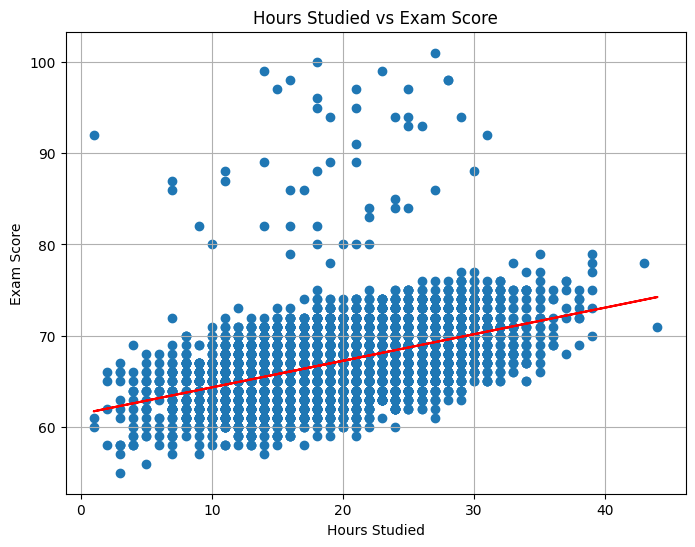

In [ ]:
# Exploratory Data Analysis
# Example of high correlation
plt.figure(figsize=(8, 6))
plt.scatter(data['Hours_Studied'], data['Exam_Score'])
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

m, b = np.polyfit(data['Hours_Studied'], data['Exam_Score'], 1)

# Plotting the line of best fit
plt.plot(data['Hours_Studied'], m*data['Hours_Studied'] + b, color='red', label='Best fit line')
plt.grid(True)
plt.show()


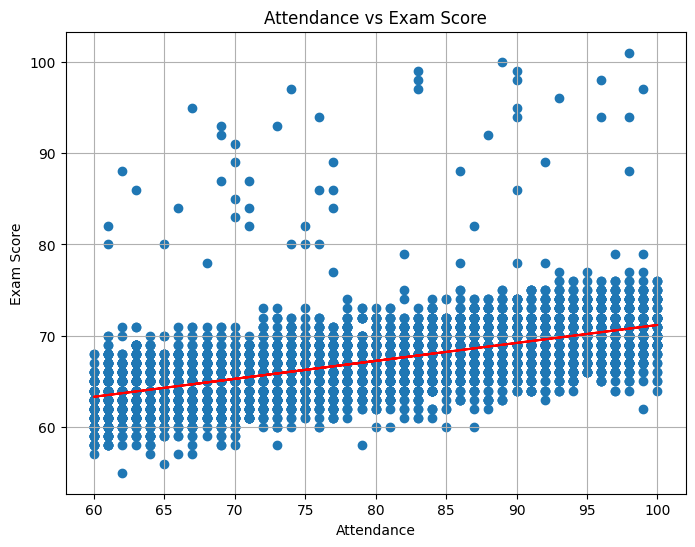

In [ ]:
# Exploratory Data Analysis
# Example of Medium correlation
plt.figure(figsize=(8, 6))
plt.scatter(data['Attendance'], data['Exam_Score'])
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')

m, b = np.polyfit(data['Attendance'], data['Exam_Score'], 1)

# Plotting the line of best fit
plt.plot(data['Attendance'], m*data['Attendance'] + b, color='red', label='Best fit line')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

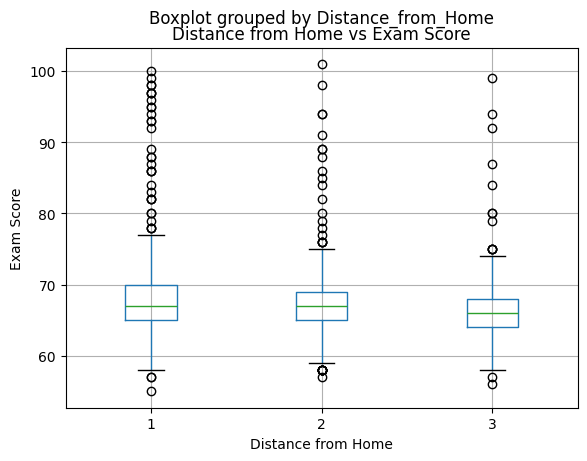

In [ ]:
# Exploratory Data Analysis
# Example of Moderate correlation with exam score
plt.figure(figsize=(8, 6))
data.boxplot(column='Exam_Score', by='Distance_from_Home', grid=True)
plt.title('Distance from Home vs Exam Score')
plt.xlabel('Distance from Home')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

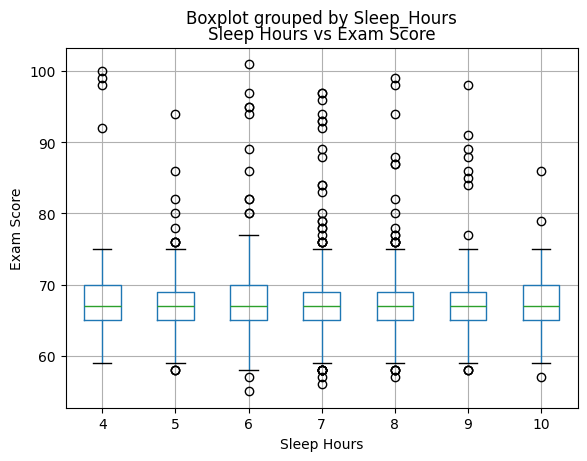

In [ ]:
# Exploratory Data Analysis
# Example of No Correlation
plt.figure(figsize=(8, 6))
data.boxplot(column='Exam_Score', by='Sleep_Hours', grid=True)
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()


The above box plot shows very little correlation, if any, between Sleep Hours and Exam Scores. Thus, we decided to eliminate Sleep Hours from the dataset.

# Feature Selection Conclusion
After observing some independent plots between features and the exam score, we have plotted all features and their correlation to Exam_score on one bar plot below. Also included is some cutoff correlation at 0.15, to aid in visualizing which features we selected. This gives us the 6 features we talked about in the introduction to Exploratory Data Analysis. We also included two other features which have relatively strong negative correlations, although their magnitude is similar to some features we chose not to include, they both represent unique information to the context of test scores that the other features don't include, therefore we decided to include these.

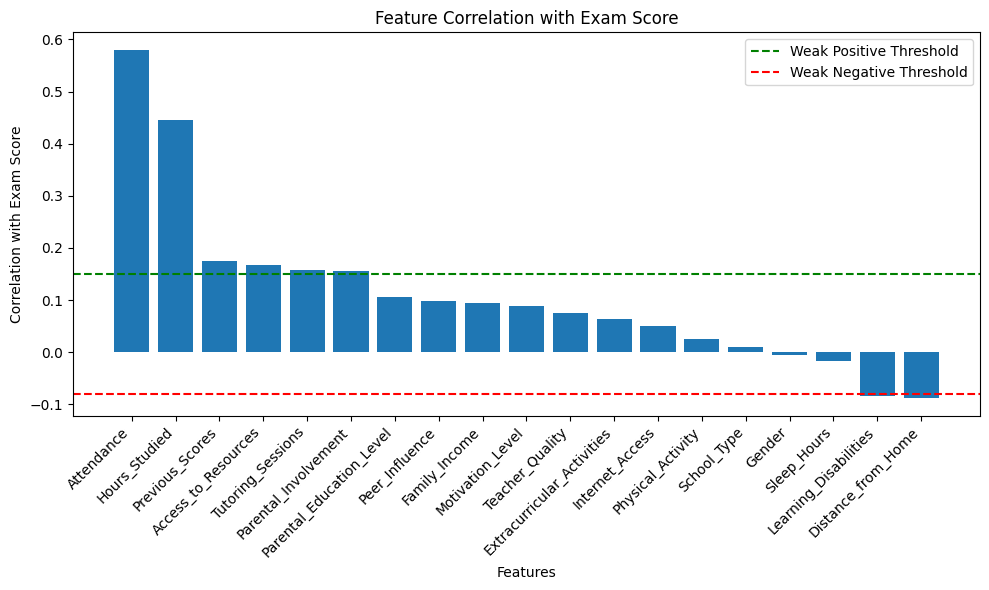

In [ ]:
# Calculate correlations
correlations = data.corr()['Exam_Score']

# Sort correlations in descending order (excluding Exam_Score)
sorted_correlations = correlations.sort_values(ascending=False)[1:]

# Create the plot
plt.figure(figsize=(10, 6))
plt.axhline(y=0.15, color='g', linestyle='--', label='Weak Positive Threshold')
plt.axhline(y=-0.08, color='r', linestyle='--', label='Weak Negative Threshold')
plt.bar(sorted_correlations.index, sorted_correlations.values)  # Exclude 'Exam_Score' itself
plt.xlabel("Features")
plt.ylabel("Correlation with Exam Score")
plt.title("Feature Correlation with Exam Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

# Final Data Set Construction
Given the above exploratory analysis and data cleaning done to remove null values, we can now select the features we aim to use in our model, remove null values in this new smaller dataset, then construct a train, test, and validation dataset.


In [ ]:
from sklearn.model_selection import train_test_split
# Remove all features not being used in data analysis, due to small impact on exam score
main_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Parental_Involvement', 'Learning_Disabilities', 'Access_to_Resources', 'Distance_from_Home', 'Tutoring_Sessions', 'Exam_Score']
final_data = loaded_data[main_features]
# Drop null values, only for these features
final_data = final_data.dropna(subset=['Distance_from_Home'])
# Apply Mappings to produce numerical data
# Apply mappings
for column, mapping in categories_mapping.items():
  if column in final_data.columns:
    final_data[column] = final_data[column].map(mapping)

for column, mapping in binary_mapping.items():
  if column in final_data.columns:
    final_data[column] = final_data[column].map(mapping)

# Confirming no missing data
print("Columns and number of null rows")
print(final_data.isna().sum())

# Construct train, validation, and test sets
# Use splits: train: 80%, Validation: 10%, Test: 10%
train_and_validation_df, test_df = train_test_split(final_data, test_size=0.1, random_state=2)

train_df, validation_df = train_test_split(train_and_validation_df, test_size=1/9, random_state=112)

train_df.to_csv('train.csv', index=False)
validation_df.to_csv('validation.csv', index=False)
test_df.to_csv('test.csv', index=False)
# We now have a csv for train, validation, and test
train_df.sample(10)

Columns and number of null rows
Hours_Studied            0
Attendance               0
Previous_Scores          0
Parental_Involvement     0
Learning_Disabilities    0
Access_to_Resources      0
Distance_from_Home       0
Tutoring_Sessions        0
Exam_Score               0
dtype: int64


,Hours_Studied,Attendance,Previous_Scores,Parental_Involvement,Learning_Disabilities,Access_to_Resources,Distance_from_Home,Tutoring_Sessions,Exam_Score
522,16,95,88,2,0,1,1,2,70
942,24,78,91,2,0,2,3,0,68
3643,20,82,80,3,1,2,1,3,68
4937,27,72,63,2,0,2,2,1,67
1915,17,89,52,3,0,2,3,0,67
3551,11,65,62,2,0,1,3,2,60
4156,23,84,61,2,0,3,2,2,70
2412,13,63,88,1,0,2,1,0,59
1147,11,91,61,2,0,1,3,1,65
835,21,97,53,2,1,3,2,0,67
